In [66]:
import pandas as pd 
import numpy as np

from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df = pd.read_excel ('gas-turbine.xlsx')
display(df)
X = np.array(df[['t_in_comp','t_housing_comp','t_housing2_turb','t_housing4_turb','t_out_turb','gas_fuel_flow','gas_fuel_pres','liq_fuel_flow','liq_fuel_pres']])
y = np.array(df[['real_power','app_power','react_power']])
display(X)
display(y)

,Unnamed: 0,t_in_comp,t_housing_comp,t_housing2_turb,t_housing4_turb,t_housing6_turb,t_out_turb,gas_fuel_flow,gas_fuel_pres,liq_fuel_flow,liq_fuel_pres,real_power,app_power,react_power
0,0,26.1,280.0,293,285,278,256.0,449,24.0,0.0,0.31,450.0,523,271.0
1,1,25.7,282.0,294,285,278,257.0,452,23.6,0.0,0.31,468.0,565,291.0
2,2,25.5,279.0,295,285,280,256.0,456,24.0,0.0,0.32,472.0,555,295.0
3,3,25.4,277.0,292,284,277,255.0,454,24.3,0.0,0.32,453.0,539,277.0
4,4,25.4,277.0,292,284,277,255.0,454,24.3,0.0,0.32,503.0,539,277.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2941,2941,1250.0,545.0,554,563,530,530.0,997,24.3,0.0,0.12,3629.0,3835,1245.0
2942,2942,1250.0,520.0,534,536,503,503.0,953,24.1,0.0,0.12,3400.0,3589,1162.0
2943,2943,1250.0,582.0,541,553,516,516.0,979,24.2,0.0,0.13,3533.0,3758,1238.0
2944,2944,1250.0,385.0,392,384,371,371.0,668,24.5,0.0,0.11,1821.0,1977,784.0


array([[2.61e+01, 2.80e+02, 2.93e+02, ..., 2.40e+01, 0.00e+00, 3.10e-01],
       [2.57e+01, 2.82e+02, 2.94e+02, ..., 2.36e+01, 0.00e+00, 3.10e-01],
       [2.55e+01, 2.79e+02, 2.95e+02, ..., 2.40e+01, 0.00e+00, 3.20e-01],
       ...,
       [1.25e+03, 5.82e+02, 5.41e+02, ..., 2.42e+01, 0.00e+00, 1.30e-01],
       [1.25e+03, 3.85e+02, 3.92e+02, ..., 2.45e+01, 0.00e+00, 1.10e-01],
       [1.25e+03, 3.82e+02, 3.88e+02, ..., 2.42e+01, 0.00e+00, 1.30e-01]])

array([[ 450.,  523.,  271.],
       [ 468.,  565.,  291.],
       [ 472.,  555.,  295.],
       ...,
       [3533., 3758., 1238.],
       [1821., 1977.,  784.],
       [1765., 1950.,  850.]])

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

clf = MLPRegressor(max_iter=1000, random_state=0)
clf.fit(X_train, y_train)

y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_predict)
print('el error de entrenamiento es MSE = ', mse_train)

mse_train_test = mean_squared_error(y_test, y_test_predict)
print('el error de test es MSE = ', mse_train_test)

r2train = r2_score(y_train, y_train_predict)
r2test = r2_score(y_test, y_test_predict)
print("R2 Training: ", r2train)
print("R2 Test: ", r2test)

el error de entrenamiento es MSE =  438333.8589038554
el error de test es MSE =  160887.74923943807
R2 Training:  0.6782515207711768
R2 Test:  0.7072014387224406


In [3]:
resultado = []
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)

    clf = MLPRegressor(max_iter=1000, random_state=i)
    clf.fit(X_train, y_train)

    y_train_predict = clf.predict(X_train)
    y_test_predict = clf.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_train_predict)
    mse_train_test = mean_squared_error(y_test, y_test_predict)
    resultado.append([i, mse_train, mse_train_test])
resultado = np.array(resultado)

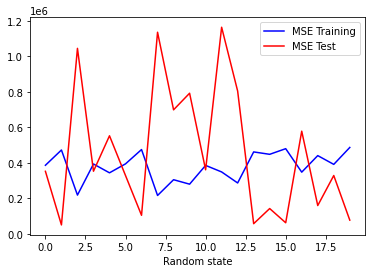

In [4]:
import matplotlib.pyplot as plt
xd = np.arange(20)
plt.plot(xd, resultado[:,1], color='blue')
plt.plot(xd, resultado[:,2], color='red')
plt.xlabel('Random state')
plt.legend(["MSE Training", "MSE Test"])
plt.show()

In [5]:
#ejercicio 3
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
resultado = []

for i in range(7):
    capas = [50]*i
    clf = MLPRegressor(max_iter=10000, hidden_layer_sizes=capas, random_state=0)
    clf.fit(X_train, y_train)

    y_train_predict = clf.predict(X_train)
    y_test_predict = clf.predict(X_test)

    mse_train = mean_squared_error(y_train, y_train_predict)
    mse_train_test = mean_squared_error(y_test, y_test_predict)
    res = [i, mse_train, mse_train_test]
    resultado.append(res)
    display(res)
resultado = np.array(resultado)


[0, 500899.62067939976, 319249.373399484]

[1, 419081.9659696939, 250790.5330132566]

[2, 414154.53661566327, 246435.5362988642]

[3, 411297.4564131245, 243641.94379372022]

[4, 410355.3416154636, 242858.00241511487]

[5, 412955.2688235366, 244048.8922380484]

[6, 416283.1235814171, 247093.68964220476]

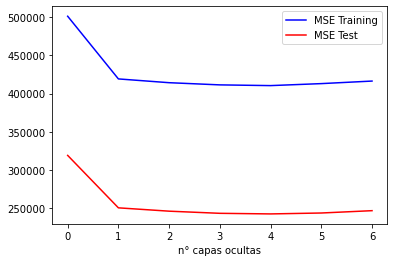

In [6]:
import matplotlib.pyplot as plt
xd = np.arange(7)
plt.plot(xd, resultado[:,1], color='blue')
plt.plot(xd, resultado[:,2], color='red')
plt.xlabel('n° capas ocultas')
plt.legend(["MSE Training", "MSE Test"])
plt.show()

In [7]:
#ejercicio 4
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2)
scaler = MaxAbsScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
clf = MLPRegressor(random_state=0)
clf.fit(X_train_scaled,y_train)
parameters = {'max_iter':[2000, 10000], 'hidden_layer_sizes':[(), (6)], 'activation':('identity', 'relu'), 'alpha':[0.01, 1],'batch_size':[1,100]}
gridcv = GridSearchCV(clf, parameters, scoring='neg_mean_squared_error', cv=2)
gridcv.fit(X_train_scaled, y_train)

C:\Users\matiu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\matiu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\matiu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\matiu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\matiu\anaconda3\lib\site-packages\sklearn\neural_network\_m

GridSearchCV(cv=2, estimator=MLPRegressor(random_state=0),
             param_grid={'activation': ('identity', 'relu'), 'alpha': [0.01, 1],
                         'batch_size': [1, 100], 'hidden_layer_sizes': [(), 6],
                         'max_iter': [2000, 10000]},
             scoring='neg_mean_squared_error')

In [10]:
mydict = {'params':gridcv.cv_results_['params'], 'rank_test_score':gridcv.cv_results_['rank_test_score'], 'mean_test_score':gridcv.cv_results_['mean_test_score']}
mydata = pd.DataFrame.from_dict(mydict)
display(mydata)
display(mydata[mydata.rank_test_score == 1])
print(mydata.iloc[26]['params'])
print(mydata.iloc[27]['params'])

,params,rank_test_score,mean_test_score
0,"{'activation': 'identity', 'alpha': 0.01, 'bat...",19,-5.986254e+05
1,"{'activation': 'identity', 'alpha': 0.01, 'bat...",13,-4.900891e+05
2,"{'activation': 'identity', 'alpha': 0.01, 'bat...",10,-3.508148e+05
3,"{'activation': 'identity', 'alpha': 0.01, 'bat...",10,-3.508148e+05
4,"{'activation': 'identity', 'alpha': 0.01, 'bat...",29,-4.541068e+06
5,"{'activation': 'identity', 'alpha': 0.01, 'bat...",25,-3.274124e+06
6,"{'activation': 'identity', 'alpha': 0.01, 'bat...",15,-5.065885e+05
7,"{'activation': 'identity', 'alpha': 0.01, 'bat...",12,-3.508338e+05
8,"{'activation': 'identity', 'alpha': 1, 'batch_...",21,-8.698847e+05
9,"{'activation': 'identity', 'alpha': 1, 'batch_...",23,-8.962511e+05


,params,rank_test_score,mean_test_score
26,"{'activation': 'relu', 'alpha': 1, 'batch_size...",1,-349470.69529
27,"{'activation': 'relu', 'alpha': 1, 'batch_size...",1,-349470.69529


{'activation': 'relu', 'alpha': 1, 'batch_size': 1, 'hidden_layer_sizes': 6, 'max_iter': 2000}
{'activation': 'relu', 'alpha': 1, 'batch_size': 1, 'hidden_layer_sizes': 6, 'max_iter': 10000}


In [13]:
clf = MLPRegressor(max_iter=50000, hidden_layer_sizes=(6), activation='relu', batch_size=1, alpha=1.0, random_state=0)
clf.fit(X_train_scaled, y_train)

y_train_predict = clf.predict(X_train_scaled)
y_test_predict = clf.predict(X_test_scaled)

mse_train = mean_squared_error(y_train, y_train_predict)
print('el error de entrenamiento es MSE = ', mse_train)

mse_train_test = mean_squared_error(y_test, y_test_predict)
print('el error de test es MSE = ', mse_train_test)

r2train = r2_score(y_train, y_train_predict)
r2test = r2_score(y_test, y_test_predict)
print("R2 Training: ", r2train)
print("R2 Test: ", r2test)

el error de entrenamiento es MSE =  348862.0237933094
el error de test es MSE =  477850.3041412172
R2 Training:  0.7504768199529894
R2 Test:  0.5503151010248432


In [36]:
# se rehace el grid manteniendo el relu y el batch size, cambiando el alpha y la cantidad de neuronas, utilizando solo 1 capa
# ya que como se muestra en 3, con mas de una capa la disminucion del error no es significativo.
clf2 = MLPRegressor(random_state=0)
clf2.fit(X_train_scaled,y_train)
parameters2 = {'max_iter':[10000], 'hidden_layer_sizes':[(6),(100, 25)], 'activation':['relu'], 'alpha':[0.000001,0.0001,1],'batch_size':[1]}
gridcv2 = GridSearchCV(clf2, parameters2, scoring='neg_mean_squared_error', cv=2)
gridcv2.fit(X_train_scaled, y_train)

C:\Users\matiu\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


GridSearchCV(cv=2, estimator=MLPRegressor(random_state=0),
             param_grid={'activation': ['relu'], 'alpha': [1e-06, 0.0001, 1],
                         'batch_size': [1],
                         'hidden_layer_sizes': [6, (100, 25)],
                         'max_iter': [10000]},
             scoring='neg_mean_squared_error')

In [39]:
mydict2 = {'params':gridcv2.cv_results_['params'], 'rank_test_score':gridcv2.cv_results_['rank_test_score'], 'mean_test_score':gridcv2.cv_results_['mean_test_score']}
mydata2 = pd.DataFrame.from_dict(mydict2)
display(mydata2)
display(mydata2[mydata2.rank_test_score == 1])
print(mydata2.iloc[5]['params'])
print(mydata2.iloc[1]['params'])

,params,rank_test_score,mean_test_score
0,"{'activation': 'relu', 'alpha': 1e-06, 'batch_...",6,-350686.664900
1,"{'activation': 'relu', 'alpha': 1e-06, 'batch_...",2,-347982.275164
2,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",5,-350684.017237
3,"{'activation': 'relu', 'alpha': 0.0001, 'batch...",4,-350156.996305
4,"{'activation': 'relu', 'alpha': 1, 'batch_size...",3,-349470.695290
5,"{'activation': 'relu', 'alpha': 1, 'batch_size...",1,-347388.528177


,params,rank_test_score,mean_test_score
5,"{'activation': 'relu', 'alpha': 1, 'batch_size...",1,-347388.528177


{'activation': 'relu', 'alpha': 1, 'batch_size': 1, 'hidden_layer_sizes': (100, 25), 'max_iter': 10000}
{'activation': 'relu', 'alpha': 1e-06, 'batch_size': 1, 'hidden_layer_sizes': (100, 25), 'max_iter': 10000}


In [45]:
clf2 = MLPRegressor(max_iter=10000, hidden_layer_sizes=(100,25), activation='relu', batch_size=1, alpha=1.0, random_state=0)
clf2.fit(X_train_scaled, y_train)

y_train_predict = clf2.predict(X_train_scaled)
y_test_predict = clf2.predict(X_test_scaled)

mse_train2 = mean_squared_error(y_train, y_train_predict)
print('el error de entrenamiento es MSE = ', mse_train2)

mse_train_test2 = mean_squared_error(y_test, y_test_predict)
print('el error de test es MSE = ', mse_train_test2)

r2train2 = r2_score(y_train, y_train_predict)
r2test2 = r2_score(y_test, y_test_predict)
print("R2 Training: ", r2train2)
print("R2 Test: ", r2test2)


el error de entrenamiento es MSE =  359028.8523775144
el error de test es MSE =  487340.96794436546
R2 Training:  0.7312338428523834
R2 Test:  0.5415910782591641


In [67]:
display(y[:,1])
#ejercicio 5
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
y_predict = np.concatenate((y_train_predict,y_test_predict))
display(y_predict[:,1])
%matplotlib qt
figure(figsize=(14,5)) # ajustar tamano figura
plt.plot(y[:,0],color='red',label='real')
plt.plot(y_predict[:,0],color='blue',marker='o', linestyle ='', label = 'prediccion' )
plt . title ( 'real_power' )
plt . legend () # activa que se vean las etiquetas ( label )
plt . show () # muestra grafico

array([ 523.,  565.,  555., ..., 3758., 1977., 1950.])

array([2845.148678  , 2398.86909016, 1095.23458569, ..., 2467.34173021,
       1072.61605214, 2313.38419133])

In [68]:
figure(figsize=(14,5)) # ajustar tamano figura
plt.plot(y[:,1],color='red',label='real')
plt.plot(y_predict[:,1],color='blue',marker='o', linestyle ='', label = 'prediccion' )
plt . title ( 'app_power' )
plt . legend () # activa que se vean las etiquetas ( label )
plt . show () # muestra grafico

figure(figsize=(14,5)) # ajustar tamano figura
plt.plot(y[:,2],color='red',label='real')
plt.plot(y_predict[:,2],color='blue',marker='o', linestyle ='', label = 'prediccion' )
plt . title ( 'react_power' )
plt . legend () # activa que se vean las etiquetas ( label )
plt . show () # muestra grafico

In [ ]:
#ejercicio 6